## 1.	Найти стационарное решение уравнений (28)-(29) методического пособия, определить тип особой точки.

$$C_m \cdot \frac{dV}{dt} = I_{\text{syn}} - I_{\text{Na}} - I_{\text{K}} - I_L, \tag{28}$$

$$\tau_n(V) \cdot \frac{dn}{dt} = (n_\infty(V) - n)Q, \tag{29}$$

$$\text{где } I_{\text{Na}} = g_{\text{Na}} m_\infty^3(V)(C(V) - n)(V - V_{\text{Na}}), \quad I_{\text{K}} = g_{\text{K}} n^4 h_{\text{K}}(V - V_{\text{K}}), \quad I_L = g_L(V - V_L),$$

$$C(V) = n_\infty(V) + h_{\text{Na}_\infty}(V),$$

$$m_\infty(V) = \frac{1}{1 + \exp\left(\frac{-(V+33,8)}{5,2}\right)}, \quad h_{Na}(V) = \frac{1}{1 + \exp\left(\frac{V+60,5}{9,9}\right)},$$

$$n_\infty(V) = \frac{1}{1 + \exp\left(\frac{-(V+35)}{5}\right)}, \quad \tau_n(V) = \frac{68}{\exp\left(\frac{25+V}{-15}\right) + \exp\left(\frac{30+V}{20}\right)}.$$

In [27]:
from scipy import integrate
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def I_Na(V,n):
    return g_Na*((m_inf(V))**3)*(C(V)-n)*(V-V_Na)

def I_K(V,n):
    return g_K*(n**4)*h_K*(V-V_K)

def I_L(V):
    return g_L*(V-V_L)

def C(V):
    return n_inf(V)+h_Na_inf(V)

def m_inf(V):
    return 1/(1+np.exp(-(V+33.8)/5.2))

def h_Na_inf(V): #не уверена что inf
    return 1/(1+np.exp((V+60.5)/9.9))

def n_inf(V):
    return 1/(1+np.exp(-(V+35)/5))

def tau_n(V):
    return 68/(np.exp(-(25+V)/15)+np.exp((30+V)/20))

C_m=1
V_Na=52
V_K=-84
V_L=-63
g_Na=2.3
g_K=2.4
g_L=0.03
Q=8.4


h_K=0.7329

def func(X,I_syn=1.1):
    V=X[0]
    n=X[1]
    fun1=I_syn-I_Na(V,n)-I_K(V,n)-I_L(V)
    fun2=(n_inf(V)-n)*Q
    return [fun1/C_m, fun2/tau_n(V)]

def func1(V, I_syn=1.1):
    n=n_inf(V)
    return I_syn-I_Na(V,n)-I_K(V,n)-I_L(V)

print(Q)
sol=fsolve(func,[-36,0.5])
sol1=fsolve(func1,[0])
print('Решаем систему нелинейных уравнений: [V, n] =',sol)
print(f'Решаем одно нелинейное уравнение: [V, n] = [{sol1[0]}, {n_inf(sol1[0])}]')
print('Вывод: различий нет')

8.4
Решаем систему нелинейных уравнений: [V, n] = [-38.80489277   0.31843385]
Решаем одно нелинейное уравнение: [V, n] = [-38.80489277347908, 0.31843384910883493]
Вывод: различий нет


Проверка правильности найденного решения

In [28]:
print(func(sol))

[np.float64(-1.0844880549143454e-11), np.float64(-3.4215044529845427e-14)]


Вывод: найденное решение верно

Найдем стационарные точки и соответствуюцие собственные значения для $I_{syn}= 0.97, ..., 1.14$

In [9]:
from scipy.optimize import approx_fprime
I_begin=0.97
I_end=1.15

data=[]
I=I_begin
while I<=I_end:
    sol_I=fsolve(func,[-36,0.5],args=(I))
    J = approx_fprime(sol_I, func, epsilon=1e-8)
    eigenvals = np.linalg.eig(J)[0]
    eig=eigenvals[0]
    data.append({
        "I_syn": I,
        "V*": f'{sol[0]:.3f}',
        "n*": f'{sol[1]:.3f}',
        'eigs':f'{eig.real:.3f} ± {eig.imag:.3f}i'
        
    })
    I+=0.01

In [10]:
df = pd.DataFrame(data)
print(df)

    I_syn       V*     n*             eigs
0    0.97  -38.805  0.318  -0.079 ± 0.323i
1    0.98  -38.805  0.318  -0.077 ± 0.327i
2    0.99  -38.805  0.318  -0.075 ± 0.331i
3    1.00  -38.805  0.318  -0.073 ± 0.334i
4    1.01  -38.805  0.318  -0.071 ± 0.338i
5    1.02  -38.805  0.318  -0.069 ± 0.341i
6    1.03  -38.805  0.318  -0.067 ± 0.345i
7    1.04  -38.805  0.318  -0.065 ± 0.348i
8    1.05  -38.805  0.318  -0.063 ± 0.352i
9    1.06  -38.805  0.318  -0.061 ± 0.355i
10   1.07  -38.805  0.318  -0.059 ± 0.358i
11   1.08  -38.805  0.318  -0.057 ± 0.361i
12   1.09  -38.805  0.318  -0.055 ± 0.364i
13   1.10  -38.805  0.318  -0.053 ± 0.367i
14   1.11  -38.805  0.318  -0.051 ± 0.371i
15   1.12  -38.805  0.318  -0.050 ± 0.373i
16   1.13  -38.805  0.318  -0.048 ± 0.376i
17   1.14  -38.805  0.318  -0.046 ± 0.379i


Для синоптического тока $I_{syn}=1.1$

In [11]:
from scipy.optimize import approx_fprime
# Вычисление Якобиана
J = approx_fprime(sol, func, epsilon=1e-8)
print("Матрица Якобиана:")
print(J)

# Собственные числа
eigenvals = np.linalg.eig(J)[0]
print(f"Собственные числа: {eigenvals}")
#print(eigenvals*1000/np.pi/2)
print('Вывод: тип особой точки - устойчивый фокус')

Матрица Якобиана:
[[  0.28319236 -14.67677786]
 [  0.01691171  -0.38961027]]
Собственные числа: [-0.05320896+0.36748283j -0.05320896-0.36748283j]
Вывод: тип особой точки - устойчивый фокус


## 2. Найти собственную частоту (в Гц).

In [12]:

omega=0.36748283
nu=omega*1000/np.pi/2
print(f'Собственная частота равна {nu:.3f} Гц')

Собственная частота равна 58.487 Гц


## 3. Найти точку бифуркации Андронова-Хопфа

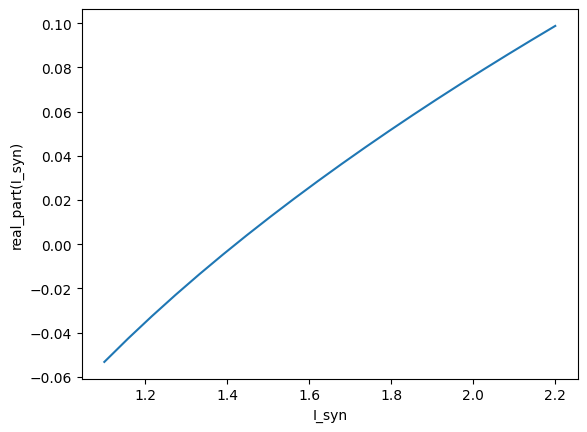

In [13]:
def real_part(Isyn):
    def func_new(X):
            return func(X,Isyn)
    
    sol=fsolve(func_new,[-40, 0.3])
    J = approx_fprime(sol, func_new, epsilon=1e-8)
    eigenvals = np.linalg.eig(J)[0]
    lam=eigenvals[0]
    return lam.real

num=20
x=np.linspace(1.1,2.2,num)
y=[0]*num
for k in range(num):
      y[k]=real_part(x[k])
     

plt.plot(x,y)
plt.xlabel('I_syn')
plt.ylabel('real_part(I_syn)')
plt.show()

#print(y)

In [14]:
eps=1e-6
I_left, I_right = 1.4, 1.5
k=0

while I_right-I_left >eps:
      rp_right=real_part(I_right)
      rp_left=real_part(I_left)
      rp_mid=real_part((I_left+I_right)/2)

      if (rp_right*rp_mid>0):
            I_right=(I_left+I_right)/2
      if (rp_left*rp_mid>0):
            I_left=(I_left+I_right)/2
      k+=1 
      if k==150:
            break

if real_part(I_right)<real_part(I_left):
      I_bif=I_right
else:
      I_bif=I_left   
      
print(f'Точка бифуркации Андронова-Хопфа: {I_bif:.3f}')


Точка бифуркации Андронова-Хопфа: 1.420


## 4. Построить область притяжения стационарного решения.

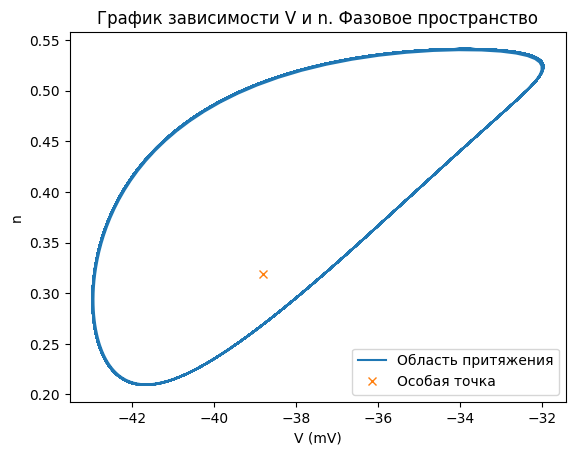

In [15]:
N=10000
tK=1000
t=np.linspace(0, tK, N+1)
V_array=[-38.64494745396648]
 
n_array=[0.27415779656174477]

for k in range(N):
    x=[V_array[k],n_array[k]]
    delt=t[k+1]-t[k]
    func_x=func(x)
    V_array.append(x[0]-func_x[0]*delt)
    n_array.append(x[1]-func_x[1]*delt)
   


V_test1=[-40]
n_test1=[ 0.4]
for k in range(N):
    x=[V_test1[k],n_test1[k]]
    delt=t[k+1]-t[k]
    func_x=func(x)
    V_test1.append(x[0]+func_x[0]*delt)
    n_test1.append(x[1]+func_x[1]*delt)

V_test2=[-30]
n_test2=[ 0.6]
for k in range(N):
    x=[V_test2[k],n_test2[k]]
    delt=t[k+1]-t[k]
    func_x=func(x)
    V_test2.append(x[0]+func_x[0]*delt)
    n_test2.append(x[1]+func_x[1]*delt)

V_test3=[-20]
n_test3=[ 0.1]
for k in range(N):
    x=[V_test3[k],n_test3[k]]
    delt=t[k+1]-t[k]
    func_x=func(x)
    V_test3.append(x[0]+func_x[0]*delt)
    n_test3.append(x[1]+func_x[1]*delt)


#plt.plot(V_test1, n_test1,color='#FF5733', linewidth=1)
#plt.plot(V_test2, n_test2,color='#FF5733', linewidth=1)
#plt.plot(V_test3, n_test3,color='#FF5733', linewidth=1)
plt.plot(V_array,n_array, label='Область притяжения')
#plt.plot(V_new,n_new, label='Предельный цикл', color='g')
plt.plot(sol[0],sol[1],'x', label='Особая точка')
plt.legend()
plt.title('График зависимости V и n. Фазовое пространство')
plt.xlabel('V (mV)')
plt.ylabel('n')
plt.show()

#print(V_array[-1], n_array[-1])




## 5. Построить периодическое решение уравнений (28)-(29) методического пособия.

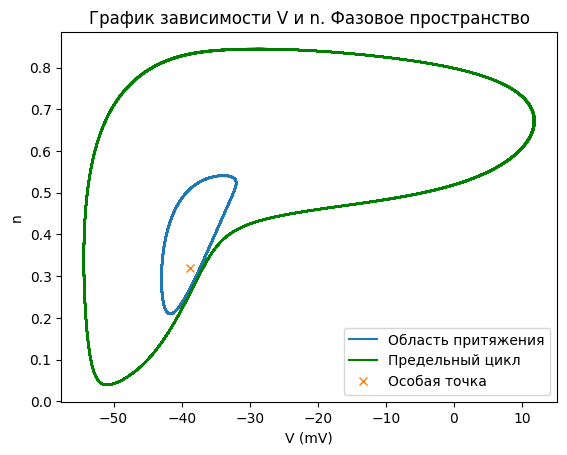

In [16]:
V_new=[-47.579067756430554 ]
n_new=[ 0.06503774669613276]
for k in range(N):
    x=[V_new[k],n_new[k]]
    delt=t[k+1]-t[k]
    func_x=func(x)
    V_new.append(x[0]+func_x[0]*delt)
    n_new.append(x[1]+func_x[1]*delt)

plt.plot(V_array,n_array, label='Область притяжения')
plt.plot(V_new,n_new, label='Предельный цикл', color='g')
plt.plot(sol[0],sol[1],'x', label='Особая точка')
plt.legend()
plt.title('График зависимости V и n. Фазовое пространство')
plt.xlabel('V (mV)')
plt.ylabel('n')
plt.show()

## 6. Построить множество достижимости линеаризованной системы для уравнений (30) методического пособия.

In [17]:
print(f'Якобиан в стационарной точке:')
print(J)
print('То есть наша система имеет вид')
print(f'dV/dt={J[0,0]:.3f}V{J[0,1]:.3f}n+{1/C_m}P')
print(f'dn/dt={J[1,0]:.3f}V{J[1,1]:.3f}n')
print('0<=P<=0.2')



Якобиан в стационарной точке:
[[  0.28319236 -14.67677786]
 [  0.01691171  -0.38961027]]
То есть наша система имеет вид
dV/dt=0.283V-14.677n+1.0P
dn/dt=0.017V-0.390n
0<=P<=0.2


Рассмотрим отклонение от найденного равновесия\
$\Delta x = y - y*$ 

Получим систему: \
$\Delta \dot{x_1} = a \Delta x_1 + b \Delta x_2 + 0.1 + u$\
$\Delta \dot{x_2} = c \Delta x_1 + d \Delta x_2$\
$-0.1 < u < 0.1$


Сделаем замену переменных\
$\Delta x_1 = \Delta z_1 + \eta$\
$\Delta x_2 = \Delta z_2 + \xi$\
$\eta = - 0.1 \frac{d}{ad-bc}$\
$\xi = 0.1 \frac{c}{ad-bc}$


В новых переменных:\
$\Delta \dot{z_1} = a \Delta z_1 + b \Delta z_2 + u$\
$\Delta \dot{z_2} = c \Delta z_1 + d \Delta z_2 $




In [18]:
a=J[0,0]
b=J[0,1]
c=J[1,0]
d=J[1,1]

mu=(a+d)/2
omega=np.sqrt(a*d-b*c-mu*mu)


Попробуем построить управление

Гамильтониан: $H=(a \Delta z_1 + b \Delta z_2 + u)\psi_1 + (c \Delta z_1 + d \Delta z_2)\psi_2$

Из вида гамильтониана можем сделать вывод, что оптимальное управление будет иметь вид: 
$u^{opt} = 0.1 \text{ sgn }\psi_1$

Система уравнений для сопряженных переменных будет иметь вид $\dot{\psi} = -A^T \psi$:\
$\dot{\psi}_1 = - a \psi_1 - c \psi_2 $\
$\dot{\psi}_2 = -b \psi_1 - d \psi_2$ 

Граничные условия (из условия трансверсальности):\
$\psi_1(t_K) = C_1$\
$\psi_2(t_K) = C_2$

Решение такой системы будет иметь вид:\
$\psi_1(t) = e^{\mu t} (K_1\cos{\omega t} + K_2\sin{\omega t})$

Коэффициенты $K_1, K_2$ найдем с помощью краевых условий. Получим:\
$K_1=\frac{C_1 e^{-\mu t_K}
(-\mu*\sin{\omega t_K}+\omega*\cos{\omega t_K}-a\sin{\omega t_K})-c C_2 e^{-\mu t_K}\sin{\omega t_K}}{(-\mu*\sin{\omega t_K}+\omega*\cos{\omega t_K}-a\sin{\omega t_K})\cos{\omega t_K}- (-\mu\cos{\omega t_K}-\omega\sin{\omega t_K} - a\cos{\omega t_K})\sin{\omega t_K}}$\
$K_2=\frac{c C_2 e^{-\mu t_K}\cos{\omega t_K}-(-\mu\cos{\omega t_K}-\omega\sin{\omega t_K} - a\cos{\omega t_K}) C_1 e^{-\mu t_K}}{(-\mu*\sin{\omega t_K}+\omega*\cos{\omega t_K}-a\sin{\omega t_K})\cos{\omega t_K}- (-\mu\cos{\omega t_K}-\omega\sin{\omega t_K} - a\cos{\omega t_K})\sin{\omega t_K}}$

Построим оптимальное управление в задаче Булгакова для направления 
$C=\begin{pmatrix}
C1\\C2
\end{pmatrix}$\


In [19]:
def u_opt_new(psi):
    if psi<0:
        return -0.1
    else:
        return 0.1

In [20]:
def Bulgakov(C,tK):
    C1, C2 = C
    t=np.linspace(0,tK,3*tK)
    arr1=np.cos(tK)
    arr2=np.sin(tK)
    arr3=-mu*arr1-omega*arr2-a*arr1
    arr4=-mu*arr2+omega*arr1-a*arr2
    b1=C1*np.exp(-mu*tK)
    b2=c*C2*np.exp(-mu*tK)
    K1=(b1*arr4-b2*arr2)/(arr1*arr4-arr2*arr3)
    K2=(arr1*b2-arr3*b1)/(arr1*arr4-arr2*arr3)

    psi1_new=np.exp(mu*t)*(K1*np.cos(omega*t)+K2*np.sin(omega*t))
    psi2_new=(1/c)*np.exp(mu*t)*((-mu*K1+omega*K2-a*K1)*np.cos(omega*t)+(-mu*K2-omega*K1-a*K2)*np.sin(omega*t))
    x1=[0]
    x2=[0]
    for k in range(len(t)-1):
        dx1=a*x1[k]+b*x2[k]+u_opt_new(psi1_new[k])
        dx2=c*x1[k]+d*x2[k]
        x1.append(x1[k]+dx1*(t[k+1]-t[k]))
        x2.append(x2[k]+dx2*(t[k+1]-t[k]))
    return x1, x2


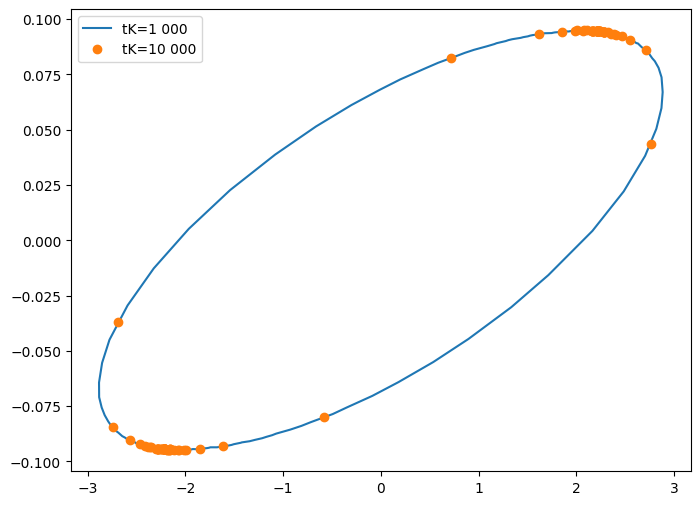

In [21]:
alpha=np.linspace(0,2*np.pi,1000)
dost1=[]
dost2=[]
dost1_1=[]
dost2_1=[]
tK=1000
t=np.linspace(0,tK,tK*4)
t_new=t
for al in alpha:
    C1=np.cos(al)
    C2=np.sin(al)
    x1, x2 = Bulgakov([C1,C2],tK)
    dost1.append(x1[-1])
    dost2.append(x2[-1])
tK=10000
for al in alpha:
    C1=np.cos(al)
    C2=np.sin(al)
    x1, x2 = Bulgakov([C1,C2],tK)
    dost1_1.append(x1[-1])
    dost2_1.append(x2[-1])

plt.figure(figsize=(8,6))
plt.plot(dost1,dost2, label='tK=1 000')
dost1_show = dost1_1[::10]    # Каждая 10-я точка
dost2_show = dost2_1[::10]    # Каждая 10-я точка
plt.plot(dost1_show,dost2_show,'o',label='tK=10 000')
plt.legend()

Решив задачу для $\Delta z_1$, $\Delta z_1$, возвращаемся к исходным переменным:\
$V = V^*+\Delta x_1 = V^* +\eta +\Delta z_1$\
$n = n^* +\Delta x_2 = V^* + \xi + \Delta z_2$

In [22]:
x1, x2 = dost1, dost2
eta=-0.1*d/(a*d-b*c)
xi=0.1*c/(a*d-b*c)
d1, d2 = [], []
for z1,z2 in zip(x1, x2):
    d1.append(sol[0]+eta+z1)
    d2.append(sol[1]+xi+z2)


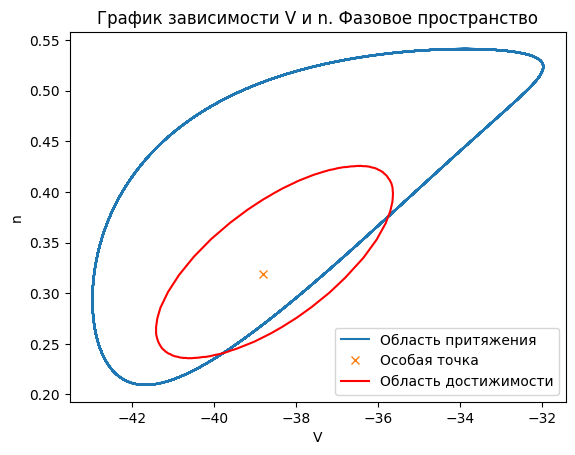

In [23]:


plt.plot(V_array[5000:],n_array[5000:], label='Область притяжения')
#plt.plot(V_new,n_new, label='Предельный цикл', color='g')
plt.plot(sol[0],sol[1],'x', label='Особая точка')
plt.plot(d1,d2,label='Область достижимости', color='r')
plt.title('График зависимости V и n. Фазовое пространство')
plt.xlabel('V')
plt.ylabel('n')
plt.legend()
plt.show()

In [24]:
def cond(v,n):
    v1=-35.75
    n1=0.375
    v2=-39.74
    n2=0.24
    fv=(v-v1)/(v2-v1)
    fn=(n-n1)/(n2-n1)
    if fv<fn:
         return 1 
    else: return 0

In [25]:
def ro(z1,z2):
    x=z1[0]-z2[0]
    y=z1[1]-z2[1]
    return np.sqrt(x*x+y*y)

di=[]
def minA(x):
    # A - V_array, n_array
    min_dist=1000
    V_star=0
    n_star=0
    arr_dist=[]
    for V, n in zip(V_array,n_array):
        #arr_dist.append(ro([V,n],x))
        if ro([V,n],x)<min_dist:
            V_star=V
            n_star=n
            min_dist=ro([V,n],x)
    return V_star, n_star, min_dist

maxmin=0
v_maxmin=0
n_maxmin=0
d1_maxmin=0
d2_maxmin=0
dists=[]
for el1, el2 in zip(d1,d2):
    v_star, n_star, min_dist = minA([el1,el2])
    dists.append(min_dist)
    if min_dist>maxmin and cond(el1,el2):
        v_maxmin=v_star
        n_maxmin=n_star
        maxmin=min_dist
        d1_maxmin=el1
        d2_maxmin=el2

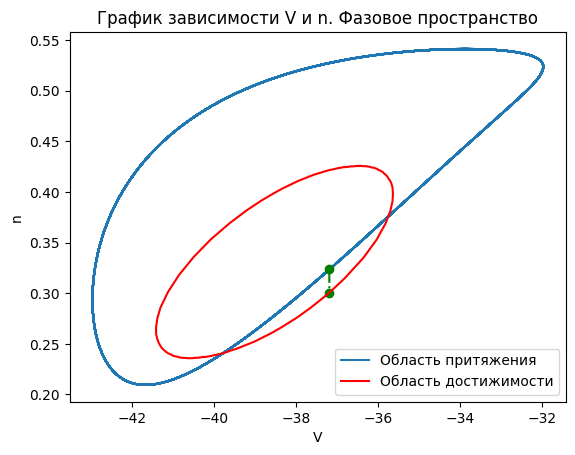

Дистанция Хаусдорфа: 0.0229


In [26]:
plt.plot(V_array[5000:],n_array[5000:], label='Область притяжения')
plt.plot([v_maxmin,d1_maxmin],[n_maxmin,d2_maxmin],'g-.o')
plt.plot(d1,d2,label='Область достижимости', color='r')
plt.title('График зависимости V и n. Фазовое пространство')
plt.legend()
plt.xlabel('V')
plt.ylabel('n')
plt.show()

print(f'Дистанция Хаусдорфа: {maxmin:.4f}')